In [ ]:
import pandas as pd

covid_sexe = pd.read_csv('reduced_covid_sexe.csv')      #Afin de faciliter l'import, placer les fichiers dans le même dossier que le projet
# pd.set_option('display.max_colwidth', None)           Affichage plein écran
covid_sexe


In [ ]:
import pandas as pd

covid_sexe = pd.read_csv('reduced_covid_sexe.csv')      #Afin de faciliter l'import, placer les fichiers dans le même dossier que le projet
print(covid_sexe)
pd.set_option('display.max_colwidth', None)
print(covid_sexe)

    # Afficher les 15 premières lignes du tableau covid_sexe.csv. (df.head?)
covid_sexe.head(15)
    # Afficher les 15 dernières lignes du tableau covid_sexe.csv. (df.tail?)
covid_sexe.tail(15)
    # Afficher les dataframe du metadata_sexe ? a quoi sert t'il ?
metadata_sexe = pd.read_csv('metadata_covid_sexe.csv',encoding="latin-1")
covid_sexe
    # Quelle est la période temporelle sur laquelle s'étendent les données ?
Intervalle_Tps=covid_sexe[2:]['Unnamed: 0']
Intervalle_Tps= Intervalle_Tps.apply(pd.to_datetime)
_Range= Intervalle_Tps.max()-Intervalle_Tps.min() 
_Range_Jour=_Range.days + 1
    # Sur combien de jours s'étale les données ? 
print(f'''
Nombre de jour totaux: {_Range_Jour} 
Debut: {Intervalle_Tps.min()}
Fin: {Intervalle_Tps.max()}
''')

In [ ]:

    # Dessiner un Heatmap des corrélations des caractéristiques qui vous semblent pertinentes d'observer ? Discuter les résultats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import seaborn as sns

covid_sexe = pd.read_csv('reduced_covid_sexe.csv')      #Afin de faciliter l'import, placer les fichiers dans le même dossier que le projet
pd.set_option('display.max_colwidth', None)
# print(covid_sexe)

# data1 = covid_sexe.columns[1:]
# data2 = covid_sexe.columns[0]
corr = covid_sexe.corr(method='pearson')
corr.style.background_gradient(cmap='Blues')
# help(sns.heatmap)

plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True,fmt='.2f', linewidths=0.5,cmap="YlGnBu")

# .mean(axis=0 ou 1)
# .min
# .max
# .std
# .sum
    # Tracer l'evolution sur un même graphique des hospitalisations et des réanimations, pour les Femmes et pour les hommes. Discuter les résultats

    # Tracer sut le même graphique le nombre de décès cumulés pour les hommes et pour les femmes, mais sur une échelle verticale différente/sépare (plt.twinx?)
    # Quelle est la probabilité pour un Français (vs) une Française de mourir du Covid au début de la période disponible ? à la fin de la période disponible ?

In [ ]:
### Heatmap seaborn
import matplot. as np 
from pandas import DataFrame
import seaborn as sns
# %matplotlib inline

Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

sns.heatmap(df, annot=True)

      Unnamed: 0     hosp  hosp.1  hosp.2     rea  rea.1  rea.2       rad  \
0           sexe      0.0     1.0     2.0     0.0    1.0    2.0       0.0   
1           jour      NaN     NaN     NaN     NaN    NaN    NaN       NaN   
2     2020-03-18   2972.0  1685.0  1248.0   771.0  525.0  239.0     816.0   
3     2020-03-19   4073.0  2256.0  1632.0  1002.0  689.0  284.0    1180.0   
4     2020-03-20   5226.0  2912.0  2134.0  1297.0  905.0  362.0    1587.0   
...          ...      ...     ...     ...     ...    ...    ...       ...   
1106  2023-03-27  13113.0  5950.0  6923.0   728.0  457.0  263.0  861972.0   
1107  2023-03-28  13178.0  6000.0  6943.0   720.0  452.0  261.0  862458.0   
1108  2023-03-29  13184.0  5989.0  6964.0   734.0  456.0  270.0  862962.0   
1109  2023-03-30  13186.0  5953.0  7003.0   732.0  459.0  267.0  863331.0   
1110  2023-03-31  13149.0  5919.0  6997.0   709.0  446.0  258.0  863837.0   

         rad.1     rad.2        dc     dc.1     dc.2  
0          1.0      

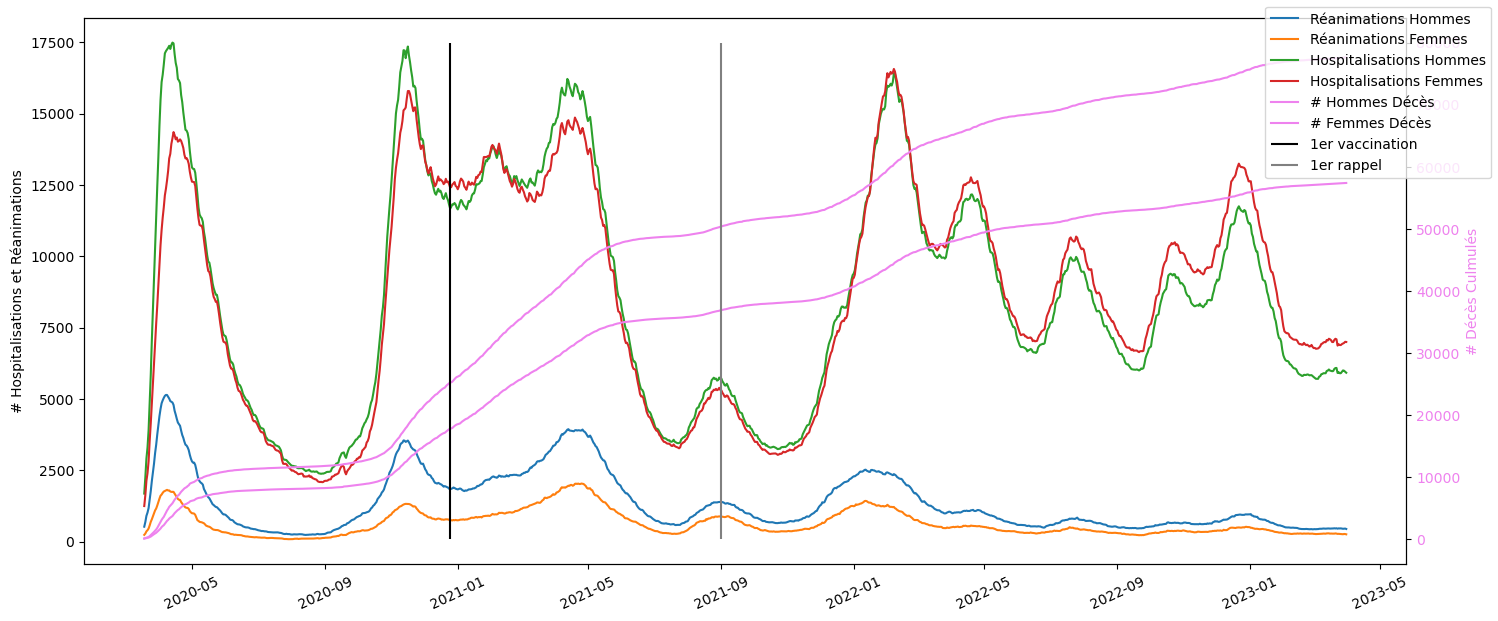

In [25]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

covid_sexe = pd.read_csv('reduced_covid_sexe.csv')      #Afin de faciliter l'import, placer les fichiers dans le même dossier que le projet
pd.set_option('display.max_colwidth', None)
print(covid_sexe)

df=covid_sexe.rename(columns={"Unnamed: 0": "Jour"})
df['Jour']=df['Jour'][2:].apply(pd.to_datetime)
# Cols = covid_sexe.columns[1:]
# Cols
# Index = covid_sexe.index
# Index
# Date= covid_sexe.Jour.astype("datetime64[ns]")
# print(Date)
# df = DataFrame(Date, index=Index, columns=Cols)
fig, ax = plt.subplots(figsize=(15,6)) # Criar um subplot
df
# help(df.set_axis)

ax.plot(df.loc[2:,['Jour']],df.loc[2:,'rea.1'],label='Réanimations Hommes')
ax.plot(df.loc[2:,['Jour']],df.loc[2:,'rea.2'],label='Réanimations Femmes')
ax.plot(df.loc[2:,['Jour']],df.loc[2:,'hosp.1'],label='Hospitalisations Hommes')
ax.plot(df.loc[2:,['Jour']],df.loc[2:,'hosp.2'],label='Hospitalisations Femmes')
ax.set_ylabel('# Hospitalisations et Réanimations')

ax2 = ax.twinx() # Criar um novo Eixo Y

color = 'violet'
ax2.set_ylabel("# Décès Culmulés",color=color)
ax2.plot(df.loc[2:,['Jour']],df.loc[2:,'dc.1'],label='# Hommes Décès',color=color)
ax2.plot(df.loc[2:,['Jour']],df.loc[2:,'dc.2'],label='# Femmes Décès',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.vlines(df['Jour'][284],0, 80000, colors='black', label = '1er vaccination')
plt.vlines(df['Jour'][534],0, 80000, colors='grey', label = '1er rappel')

fig.tight_layout()
fig.legend()
ax.tick_params(axis='x', labelrotation=25)
plt.show()

In [ ]:
fig, ax = plt.subplot(figsize=(20,5))
ax.bar(data_covid.index,datacovid["dc"])